# مشروع تحليل بيانات تصاريح تطبيق نُسُك لعام ١٤٤٤هـ 

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
# Read csv file
df = pd.read_csv('number-of-permits-from-the-nsk.csv')

# تقييم البيانات

In [3]:
# Display the first five rows of the DataFrame using .head
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم
0,10815,روضة رجال,ذكر,1444/1/3
1,10591,روضة نساء,أنثى,1444/2/4
2,73039,عمرة,ذكر,1444/1/7
3,8092,روضة رجال,ذكر,1444/1/16
4,14544,روضة نساء,أنثى,1444/3/12


In [4]:
# Display the last five rows of the DataFrame using .tail
df.tail()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم
1714,1,روضة نساء,ذكر,1444/10/19
1715,1,روضة رجال,أنثى,1444/5/23
1716,1,روضة رجال,أنثى,1444/6/8
1717,1,روضة رجال,أنثى,1444/10/29
1718,1,روضة رجال,أنثى,1444/9/5


In [5]:
# Display a basic summary of the DataFrame using .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   عدد التصاريح من نسك  1719 non-null   int64 
 1   نوع التصريح          1719 non-null   object
 2   الجنس                1719 non-null   object
 3   اليوم                1719 non-null   object
dtypes: int64(1), object(3)
memory usage: 53.8+ KB


In [6]:
# Display the entry counts using .value_counts
df.value_counts("نوع التصريح")

نوع التصريح
عمرة         708
روضة نساء    576
روضة رجال    435
Name: count, dtype: int64

In [7]:
# Display the entry counts using .value_counts
df.value_counts("الجنس")

الجنس
ذكر     930
أنثى    789
Name: count, dtype: int64

In [8]:
# Count of missing values in each column
df.isnull().sum()

عدد التصاريح من نسك    0
نوع التصريح            0
الجنس                  0
اليوم                  0
dtype: int64

In [9]:
# Count of duplicate rows 
df.duplicated().sum()

0

### :ملخص التقييم 

هناك ٤ أعمدة و ١٧١٩ صف 
 
 :الأعمدة هي
 
 `عدد التصاريح من نسك` : عدد التصاريح التي تم إصدارها من تطبيق نُسك لعام ١٤٤٤هـ

 `نوع التصريح` : تصريح عمرة، تصريح زيارة للروضة للرجال، تصريح زيارة للروضة للنساء

 `الجنس` : ذكر و أنثى

 `اليوم` : تاريخ إصدار التصريح

من خلال التقييم نلاحظ أنَّ جودة البيانات عالية لا يوجد بيانات مفقودة أو خالية، عناوين الأعمدة واضحة ووصفية، نوع البيانات صحيح لكل عمود ماعدا عمود اليوم، لا يوجد تكرارات للبيانات.

سأحتاج فقط لفصل اليوم و الشهر من عمود `اليوم` لاستخدامه في تحليلي، سأقوم بحذف السنة؛ لأنها ستكون لجميع البيانات ١٤٤٤هـ. 

# تنظيف البيانات

كما لاحظنا في القسم السابق أن البيانات نظيفة لا نحتاج إلا لفصل عمود `اليوم` إلى عمود للشهر وعمود لليوم لاحتياجي له في تحليلي وحذف عمود `اليوم` بعد الفصل

In [10]:
# Extract month and day from 'اليوم' column
df["الشهر"] = df["اليوم"].apply(lambda x : x.split("/")[1])
df["اليوم_"] = df["اليوم"].apply(lambda x : x.split("/")[2])

# Check for Extracting
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,اليوم,الشهر,اليوم_
0,10815,روضة رجال,ذكر,1444/1/3,1,3
1,10591,روضة نساء,أنثى,1444/2/4,2,4
2,73039,عمرة,ذكر,1444/1/7,1,7
3,8092,روضة رجال,ذكر,1444/1/16,1,16
4,14544,روضة نساء,أنثى,1444/3/12,3,12


In [11]:
# Delete 'اليوم' column
df.drop(["اليوم"], axis = 1, inplace = True)

# Check for Deleting
df.head()

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
0,10815,روضة رجال,ذكر,1,3
1,10591,روضة نساء,أنثى,2,4
2,73039,عمرة,ذكر,1,7
3,8092,روضة رجال,ذكر,1,16
4,14544,روضة نساء,أنثى,3,12


In [12]:
# Check for column dtypes
df.dtypes

عدد التصاريح من نسك     int64
نوع التصريح            object
الجنس                  object
الشهر                  object
اليوم_                 object
dtype: object

نحتاج إلى تحويل نوع البيانات لعمود الشهر واليوم_  من نص إلى رقم صحيح

In [13]:
# Convert 'الشهر' and 'اليوم_' columns to int64
df['الشهر'] = df['الشهر'].astype(int)
df['اليوم_'] = df['اليوم_'].astype(int)

# Check for column dtypes
df.dtypes

عدد التصاريح من نسك     int64
نوع التصريح            object
الجنس                  object
الشهر                   int64
اليوم_                  int64
dtype: object

### :ملخص التنظيف

تم فصل الشهر واليوم من عمود `اليوم` إلى عمودين منفصلين، ومن ثم حذف عمود `اليوم`، بعد ذك تم تحويل نوع البيانات للعمودين الشهر واليوم إلى نوع رقم صحيح  

# التحليل الإستكشافي للبيانات

In [14]:
# Calculate descriptive statistics for each numeric variable
df.describe()

,عدد التصاريح من نسك,الشهر,اليوم_
count,1719.000000,1719.000000,1719.000000
mean,18457.862711,6.447935,15.470622
std,22200.683072,3.399059,8.474239
min,1.000000,1.000000,1.000000
25%,8068.500000,4.000000,8.000000
50%,15467.000000,6.000000,16.000000
75%,21203.000000,9.000000,23.000000
max,160304.000000,12.000000,30.000000


:عام ١٤٤٤هـ

أقل عدد تصاريح من تطبيق نُسك كان **تصريح واحد** فقط 

أعلى عدد تصاريح من تطبيق نُسك كان **160,304** تصريح

متوسط عدد التصاريح لهذا العام كان **18,457** تصريح

In [15]:
# retrieving rows by loc method
max_permits = b = df.loc[df["عدد التصاريح من نسك"] == 160304,:]


# display
max_permits

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
1430,160304,عمرة,ذكر,9,27


كان أعلى عدد تصاريح من تطبيق نُسك هي عدد تصاريح العمرة التي تم إصدارها في يوم ٢٧ رمضان حيث كان عددها ما يقارب ١٦٠ ألف تصريح عمرة للرجال  

In [16]:
b = df.loc[(df["اليوم_"] == 27) & (df["الشهر"] == 9) & (df["نوع التصريح"] == "عمرة")]
b

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
1430,160304,عمرة,ذكر,9,27
1631,75344,عمرة,أنثى,9,27



تصاريح العمرة للنساءفي يوم ٢٧ رمضان كانت مايقارب ٧٥ ألف تصريح عمرة

In [17]:
male = df.loc[(df["نوع التصريح"] == "روضة نساء") & (df["الجنس"] == "ذكر")]
male

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
190,41,روضة نساء,ذكر,1,13
191,41,روضة نساء,ذكر,6,25
192,2,روضة نساء,ذكر,7,23
193,5,روضة نساء,ذكر,6,4
194,17,روضة نساء,ذكر,5,14
...,...,...,...,...,...
1707,1,روضة نساء,ذكر,10,17
1708,1,روضة نساء,ذكر,4,19
1709,1,روضة نساء,ذكر,8,24
1710,1,روضة نساء,ذكر,12,3


In [18]:
female = df.loc[(df["نوع التصريح"] == "روضة رجال") & (df["الجنس"] == "أنثى")]
female

,عدد التصاريح من نسك,نوع التصريح,الجنس,الشهر,اليوم_
213,2,روضة رجال,أنثى,1,8
214,5,روضة رجال,أنثى,1,14
215,1,روضة رجال,أنثى,4,1
216,1,روضة رجال,أنثى,10,5
217,1,روضة رجال,أنثى,10,6
...,...,...,...,...,...
1713,1,روضة رجال,أنثى,10,25
1715,1,روضة رجال,أنثى,5,23
1716,1,روضة رجال,أنثى,6,8
1717,1,روضة رجال,أنثى,10,29


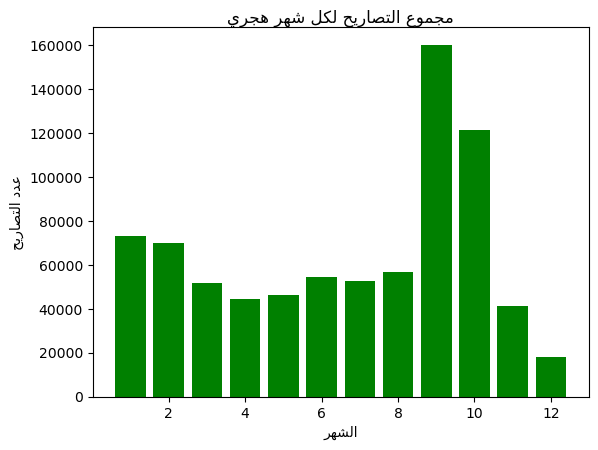

In [27]:
month = df["الشهر"]
y = df["عدد التصاريح من نسك"]
xlbl = get_display( arabic_reshaper.reshape('الشهر'))
ylbl = get_display( arabic_reshaper.reshape('عدد التصاريح'))
label = get_display(arabic_reshaper.reshape("مجموع التصاريح لكل شهر هجري")) 
          
plt.bar(x, y, label='Bar1', color='green')
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None)
plt.title (label, fontweight=10, pad='2.0')
plt.show()

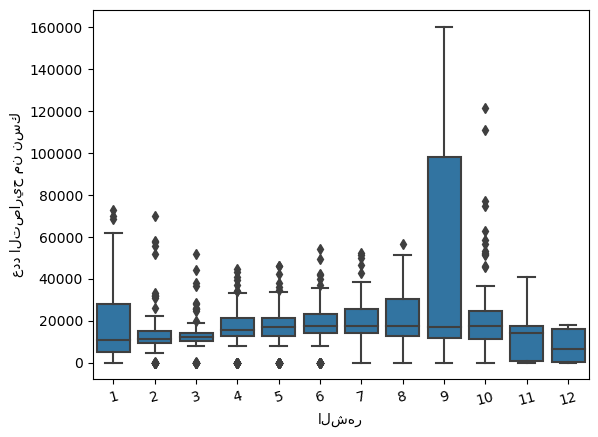

In [29]:

base_color = sns.color_palette()[0]

sns.boxplot(data=df, x='الشهر', y='عدد التصاريح من نسك', color=base_color)
plt.xticks(rotation=15);

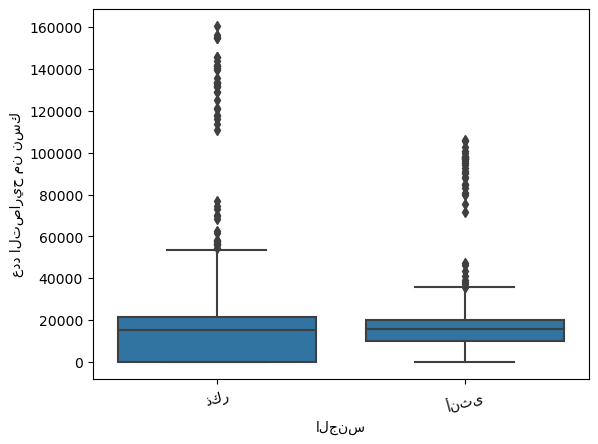

In [22]:

base_color = sns.color_palette()[0]

sns.boxplot(data=df, x='الجنس', y='عدد التصاريح من نسك', color=base_color)
plt.xticks(rotation=15);

#### ماهو الوسيط لعدد التصاريح للرجال؟
تقريباً ١٥ ألف تصريح 

#### ماهو الوسيط لعدد التصاريح للنساء؟
أيضاً ١٥ ألف تصريح تقريباً

#### ماهو أعلى عدد تصاريح للرجال؟
مايقارب ٥٥ ألف تصريح

#### ماهو أعلى عدد تصريح للنساء؟
مايقارب ٣٠ ألف تصريح


##### أغلب عدد تصاريح الرجال تقع مابين ١ - ٢٠ ألف تصريح 
##### أغلب تصاريح النساء تقع ما بين ١٠ آلاف - ٢٠ ألف تصريح